# MA 544: Programming Assignment - 2
---


In [9]:
# Import required packages

### Question 1: Visualization of Sparse Matrices
---
Create the sparse COO representation of the adjacency matrix of the following graph. One need not find the 2-dimensional representation for doing so. Find its CSR representation using appropriate Python function. Visualize this matrix by using spy() function. Refer to the notebook on sparse Matrices and check [the SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix). 

<img src="https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png" width="50%" />

[Image source: Mathworks](https://in.mathworks.com/help/examples/matlab/win64/buckydem_02.png)

COO Matrix Representation:

Row indices:
 [33 32 18 19 53 52 23 24 48 47 28 29 43 42  8  9 38 37 13 14 33 32 18 19
 53 52 23 24 48 47 28 29 44 42  8  9 38 36 12 14 15 31 20 51 25 46 30  4
 10 36 15 31 16 20 54 22 51 49 21 26 46 44 26  6 41  6 39 11 36 11 34 35
 16 55 21 50 26 45  1 57  2 56  3 60  4 59  5 58  1 57  2]

Column indices:
 [32 18 19 53 52 23 24 48 47 28 29 43 42  8  9 38 37 13 14 33 34 31 17 20
 54 51 22 25 49 46 27 30 43 41  7 10 39 37 13 15 17 54 22 49 27 44  7  3
 12 34 11 35 17 16 55 21 55 50 25 27 50 45 30  7 45 10 40 12 40 12 35 56
  3 60  4 59  5 58  6 40 11 60  4 59  5 58  1 57  2 56  3]

Data values:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

CSR Matrix Representation:

row_ptr:
 [ 0  0  2  4  5  7  8 10 10 12 14 15 16 17 18 20 22 24 24 26 28 30 32 33
 35 37 38 41 41 43 45 46 48 50 52 53 54 57 58 60 61 61 62 64 65 67 68 7

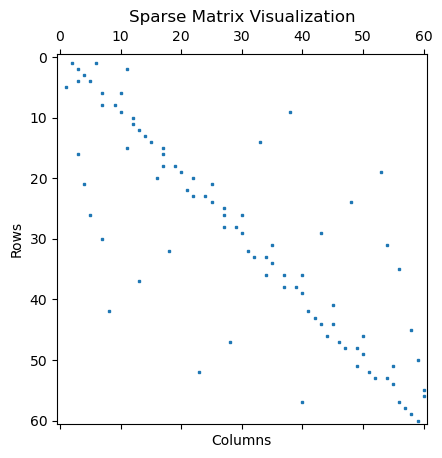

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Define the edges of the graph
edges = [ (33, 32), (32, 18), (18, 19), (19, 53), (53, 52), (52, 23), (23, 24),(24, 48), (48, 47), (47, 28), (28, 29), (29, 43), (43, 42), (42, 8),(8, 9), (9, 38), (38, 37), (37,13), (13, 14), (14, 33), (33, 34), (32, 31), (18, 17), (19, 20), (53, 54), (52, 51), (23, 22), (24, 25), (48, 49), (47, 46), (28, 27), (29, 30), (44, 43), (42, 41), (8, 7), (9, 10), (38, 39), (36, 37), (12, 13), (14, 15), (15, 17), (31, 54), (20, 22), (51, 49), (25, 27), (46, 44), (30, 7), (4, 3), (10, 12), (36, 34), (15, 11), (31, 35), (16, 17), (20, 16),(54, 55), (22, 21), (51, 55), (49, 50), (21, 25), (26, 27), (46, 50), (44, 45), (26, 30), (6, 7), (41, 45), (6, 10), (39, 40), (11, 12), (36, 40), (11, 12), (34, 35), (35, 56), (16, 3), (55, 60), (21, 4), (50, 59), (26, 5), (45, 58), (1, 6), (57, 40), (2, 11), (56, 60), (3, 4), (60, 59), (4, 5), (59, 58), (5, 1), (58, 57), (1, 2), (57, 56), (2, 3) ]

# Create the graph's adjacency matrix in COO format
rows = []
cols = []
data = []

for edge in edges:
    rows.append(edge[0])
    cols.append(edge[1])
    data.append(1)

# Convert in numpy arrays
rows = np.array(rows)
cols = np.array(cols)
data = np.array(data)

#Determine the size of the matrix (max node index + 1)
n = max(np.max(rows), np.max(cols)) + 1

# Create the COO matrix
coo_matrix = sp.coo_matrix((data, (rows, cols)), shape=(n, n))

print("COO Matrix Representation:")
print("\nRow indices:\n", coo_matrix.row)
print("\nColumn indices:\n", coo_matrix.col)
print("\nData values:\n", coo_matrix.data)

# Convert to CSR format
csr_matrix = coo_matrix.tocsr()
print("\nCSR Matrix Representation:")
print("\nrow_ptr:\n",csr_matrix.indptr)
print("\ncol_ind:\n",csr_matrix.indices)
print("\nValues:\n",csr_matrix.data)

# Visualize the sparse matrix
plt.spy(csr_matrix, markersize=2)
plt.title("Sparse Matrix Visualization")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Question 2: Page Ranking
---
Visit the SNAP networks database to find the [Berkley-Stanford Webgraph from 2002](https://snap.stanford.edu/data/web-BerkStan.html). This dataset gives the hyperlink structure of $685230$ webpages having a total of $7600595$ hyperlinks. 

A. Download the datafile and read the data to create a link matrix $Q$ in the DoK format. 

B. Use the optimized page-ranking algorithm with damping factor values $\alpha=0.85$ and $\alpha=0.95$ to find the page-ranking vector $\mathbf{r}$ while maintaining the same tolerance level for convergence. Report on the time it takes to perform these calculations. 

C. Find the indices of the $10$ highest ranking web-pages in decreasing order for the two runs. 

D. Now use a personalization vector that gives equal non-zero probability to pages with prime indices otherwise zero. Find the indices of the $10$ highest ranking web-pages. Use  only $\alpha=0.85$ in this case.

In [13]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import dok_matrix
import time

#A. Load the Berkley-Stanford Webgraph dataset
data = np.loadtxt('web-BerkStan.txt', dtype=int)
rows = data[:, 0]
cols = data[:, 1]

# Create the link matrix Q in DOK format
n = max(np.max(rows), np.max(cols)) + 1
Q = dok_matrix((n, n), dtype=np.float32)
for i in range(len(rows)):
    Q[rows[i], cols[i]] = 1

# Page ranking with damping factors alpha=0.85 and alpha=0.95
def pagerank(Q, alpha=0.85, tol=1e-6, personalization=None):
    n = Q.shape[0]
    if personalization is None:
        personalization = np.ones(n) / n 
    else:
        personalization = personalization / np.sum(personalization) #Normalize
        
    r = np.ones(n) / n #Initial rank vector
    Q = Q.tocsr()
    o_deg = np.array(Q.sum(axis=1)).flatten()
    
    # Handle dangling nodes (o_deg = 0)
    D = np.zeros_like(o_deg, dtype=np.float32)
    non_zero_mask = o_deg != 0
    D[non_zero_mask] = 1 / o_deg[non_zero_mask] #Avoid division by zero
    Q = Q.multiply(D[:, np.newaxis]) #Normalize rows
    
    # Handle dangling nodes in the rank calculation
    dangling_weights = personalization / n 
    start_time = time.time()
    while True:
        #Compute the new rank vector
        r_new = alpha * Q.dot(r) + (1 - alpha) * personalization + alpha * dangling_weights * np.sum(r[o_deg == 0])
        #Normalize the rank vector to prevent overflow
        r_new = r_new / np.sum(r_new)
        #Check for convergence
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new
    return r, time.time() - start_time

#B. Run page ranking for alpha=0.85 and alpha=0.95
r_85, time_85 = pagerank(Q, alpha=0.85)
r_95, time_95 = pagerank(Q, alpha=0.95)
print(f"Time for alpha = 0.85: {time_85} seconds")
print(f"Time for alpha = 0.95: {time_95} seconds")

#C. Find the indices of the 10 highest ranking web-pages
top_10_85 = np.argsort(r_85)[-10:][::-1]
top_10_95 = np.argsort(r_95)[-10:][::-1]
print("Top 10 pages for alpha = 0.85:", top_10_85)
print("Top 10 pages for alpha = 0.95:", top_10_95)

#D. Page ranking with a personalization vector for prime indices
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True
    
# Create personalization vector
personalization = np.zeros(n)
for i in range(n):
    if is_prime(i):
        personalization[i] = 1
personalization = personalization / np.sum(personalization)

# Run page ranking with personalization vector
r_personalized, _ = pagerank(Q, alpha=0.85, personalization=personalization)

# Find the indices of the 10 highest ranking web-pages
top_10_personalized = np.argsort(r_personalized)[-10:][::-1]
print("Top 10 pages with personalization vector:", top_10_personalized)

Time for alpha = 0.85: 1.888338327407837 seconds
Time for alpha = 0.95: 5.427472829818726 seconds
Top 10 pages for alpha = 0.85: [373671 361452 361454 361455 361456 361457 361458 361459 361500 361501]
Top 10 pages for alpha = 0.95: [373671 373683 373673 373674 373675 373676 373677 373686 373685 373684]
Top 10 pages with personalization vector: [395027 549733 549737 395119 435401 435403 435439 435437 130267 435371]


### Question 3: Clustering
---
Pick up a dataset of your choice for clustering ([UCI dataset](https://archive.ics.uci.edu/datasets)). Apply various clustering algorithms (including at least k-means and spectral clustering) to this dataset and explain your observations by using insightful plots or other some other metrics. Compare these algorithms based on some metric such as silhouette score, adjusted rand index etc.

- Read [this blog](https://machinelearningmastery.com/clustering-algorithms-with-python/) for some help.
- You can also refer to the codes and discusion [for this Kaggle dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data).

K-Means Clustering:
K-Means Silhouette Score: 0.5511916046195919
K-Means Adjusted Rand Index: 0.7163421126838476

Spectral Clustering:
Spectral Clustering Silhouette Score: 0.5553062646081594
Spectral Clustering Adjusted Rand Index: 0.7455038681804481



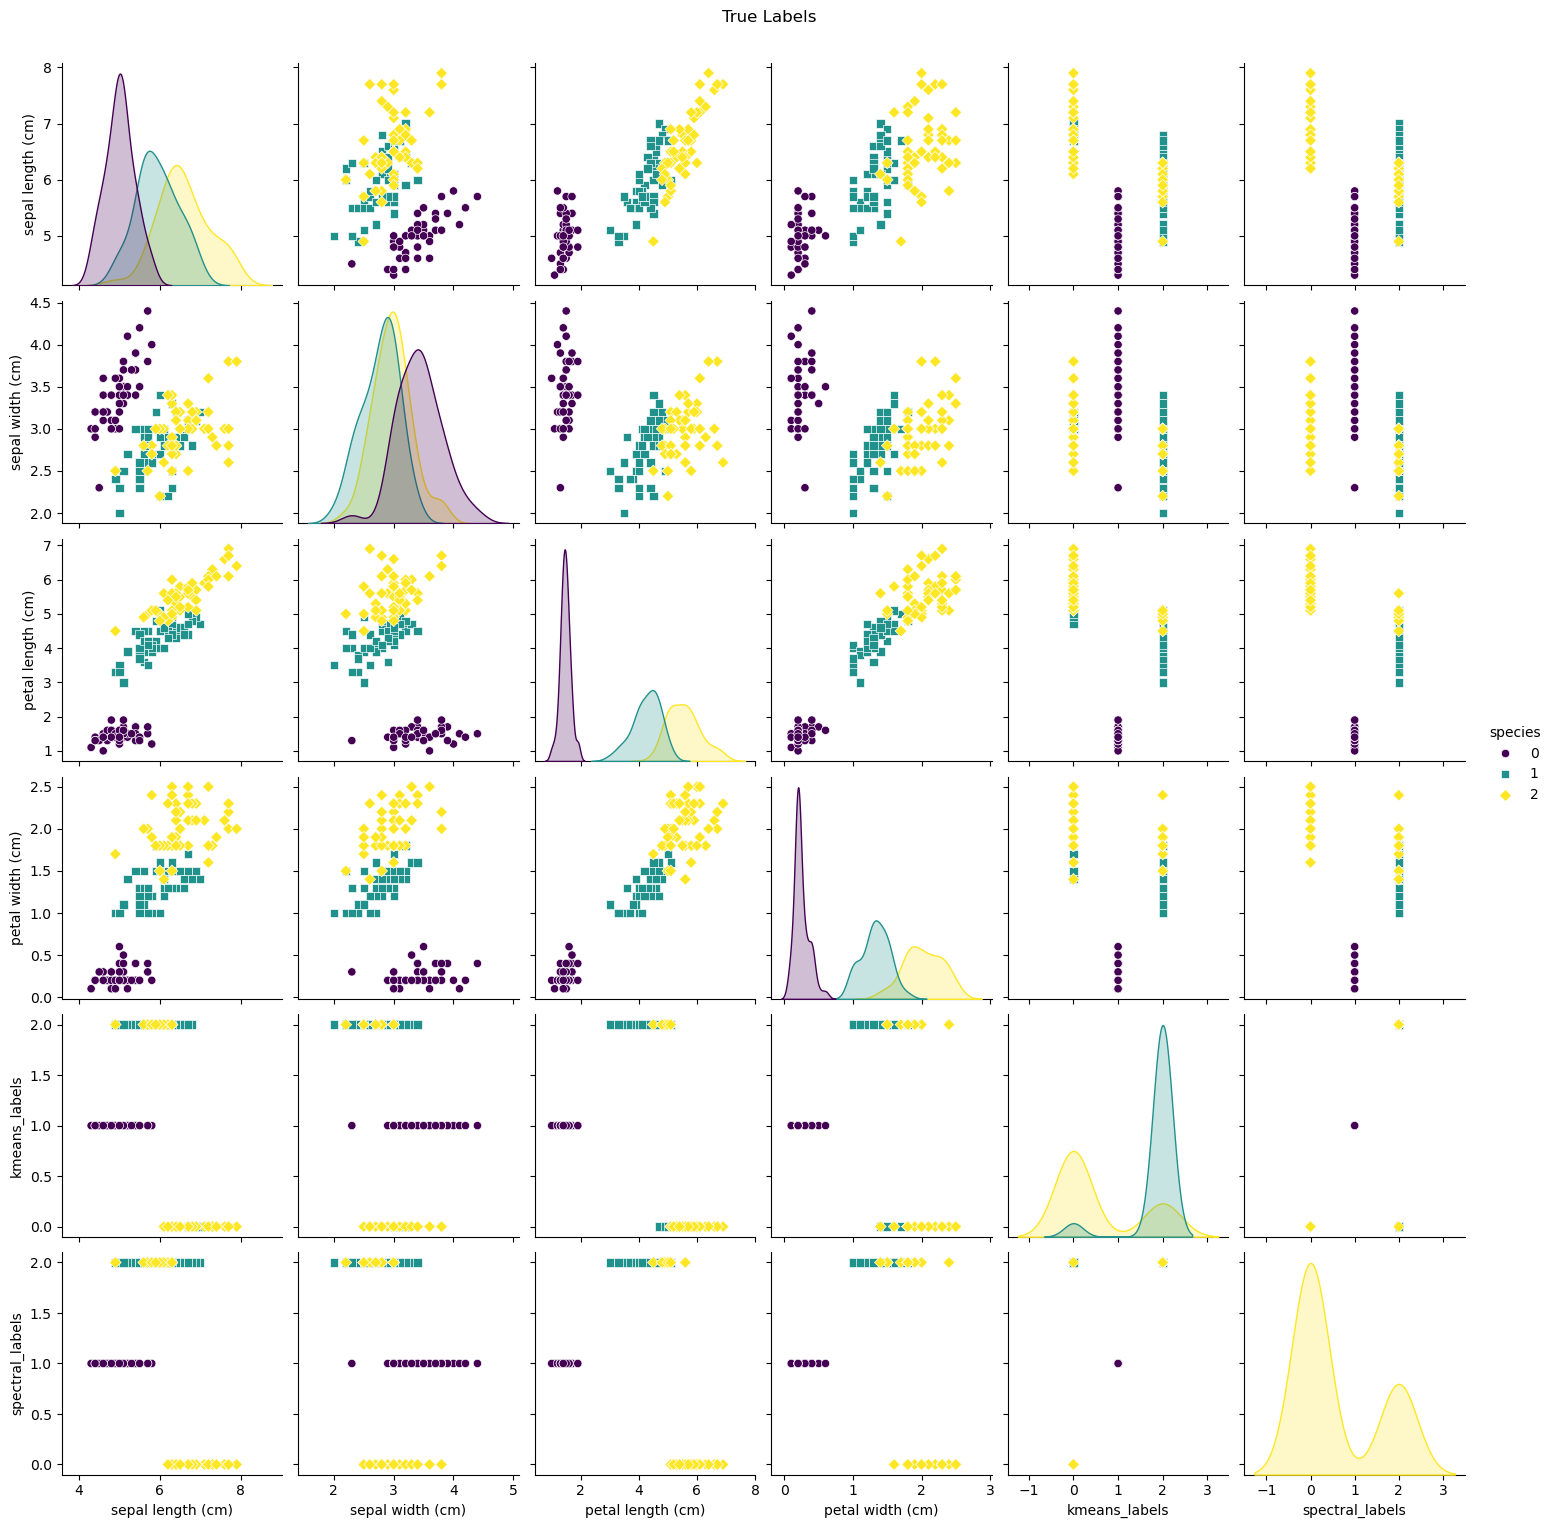

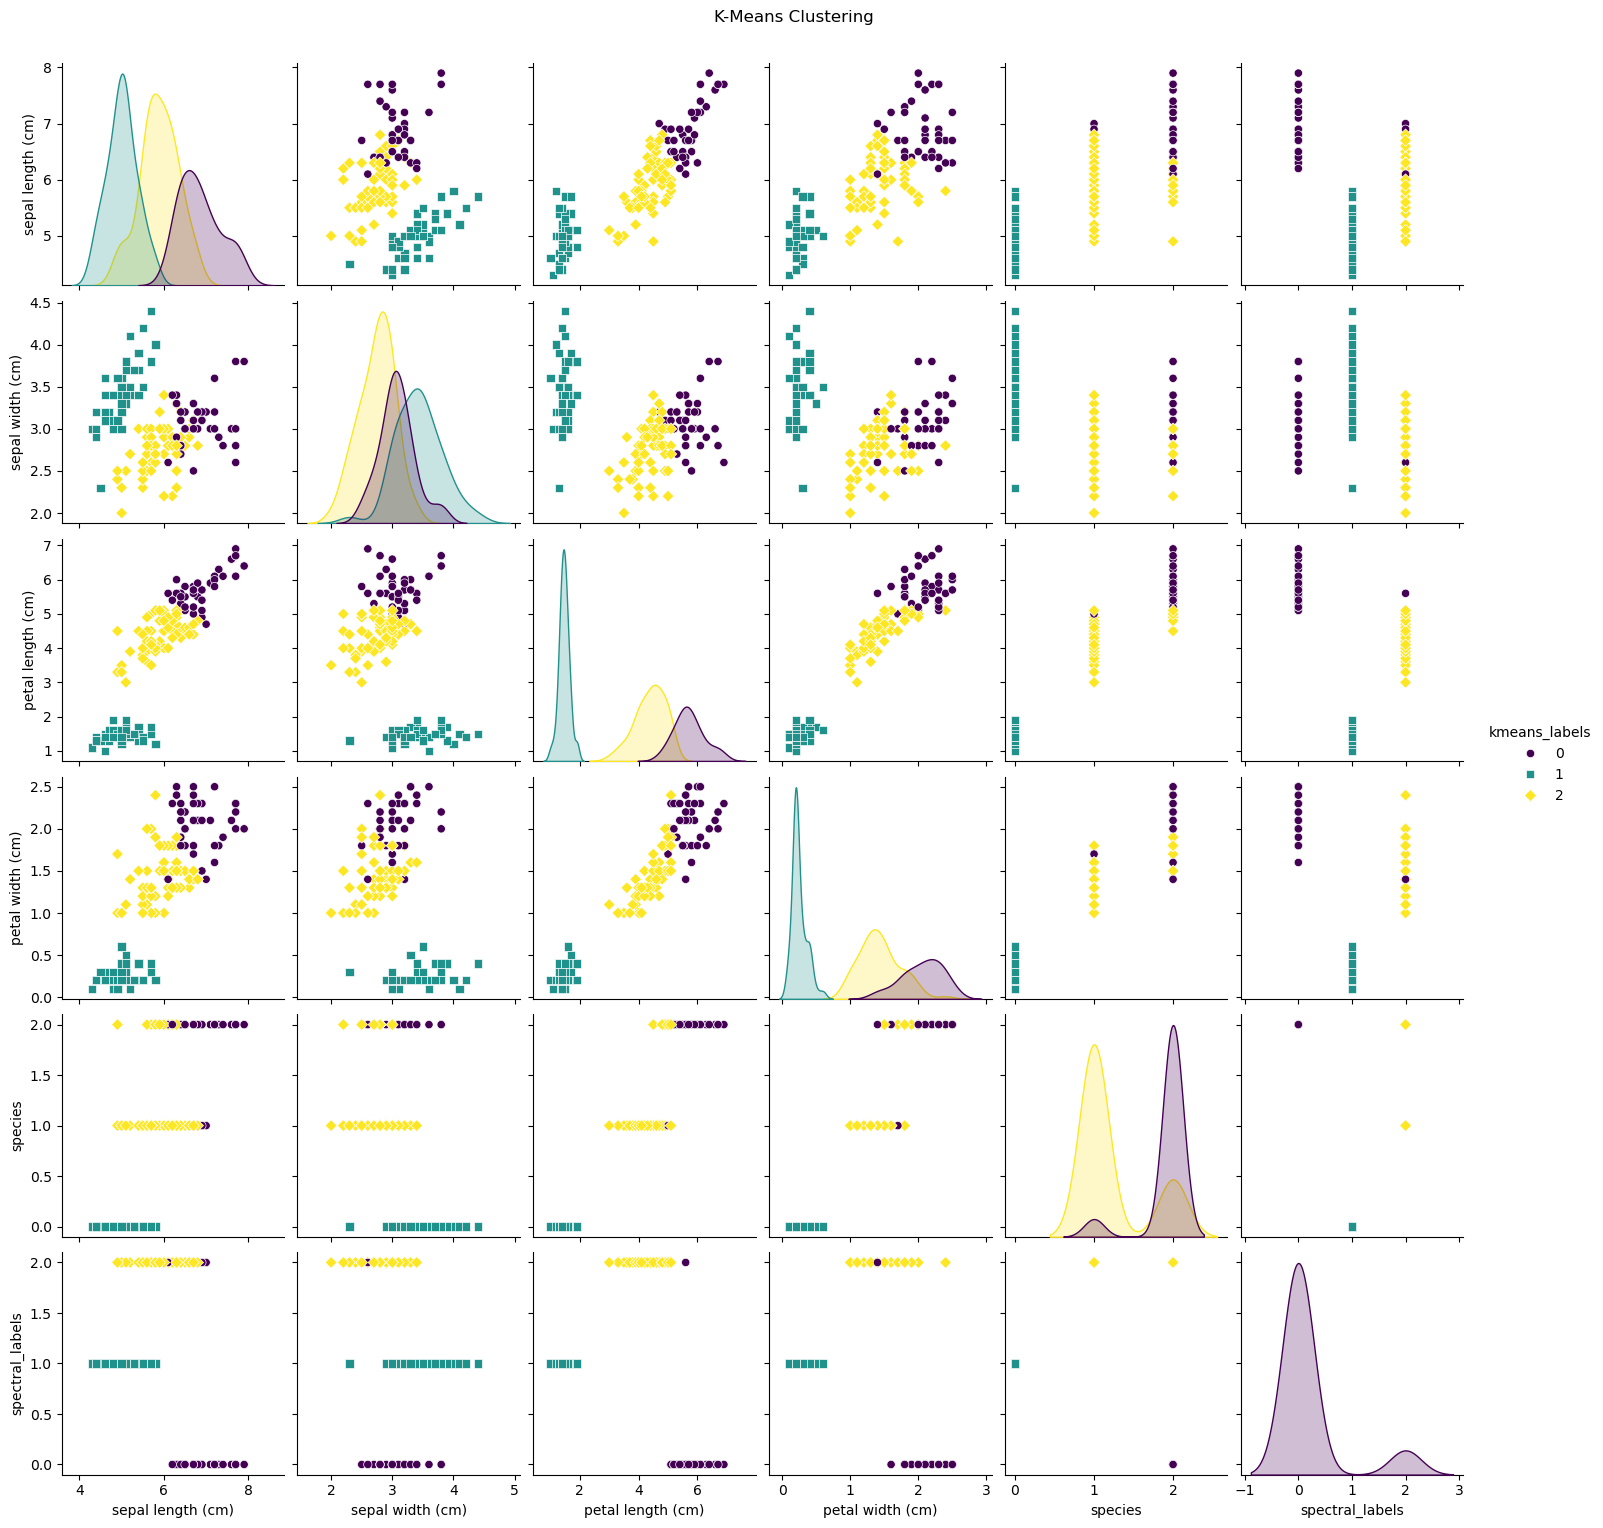

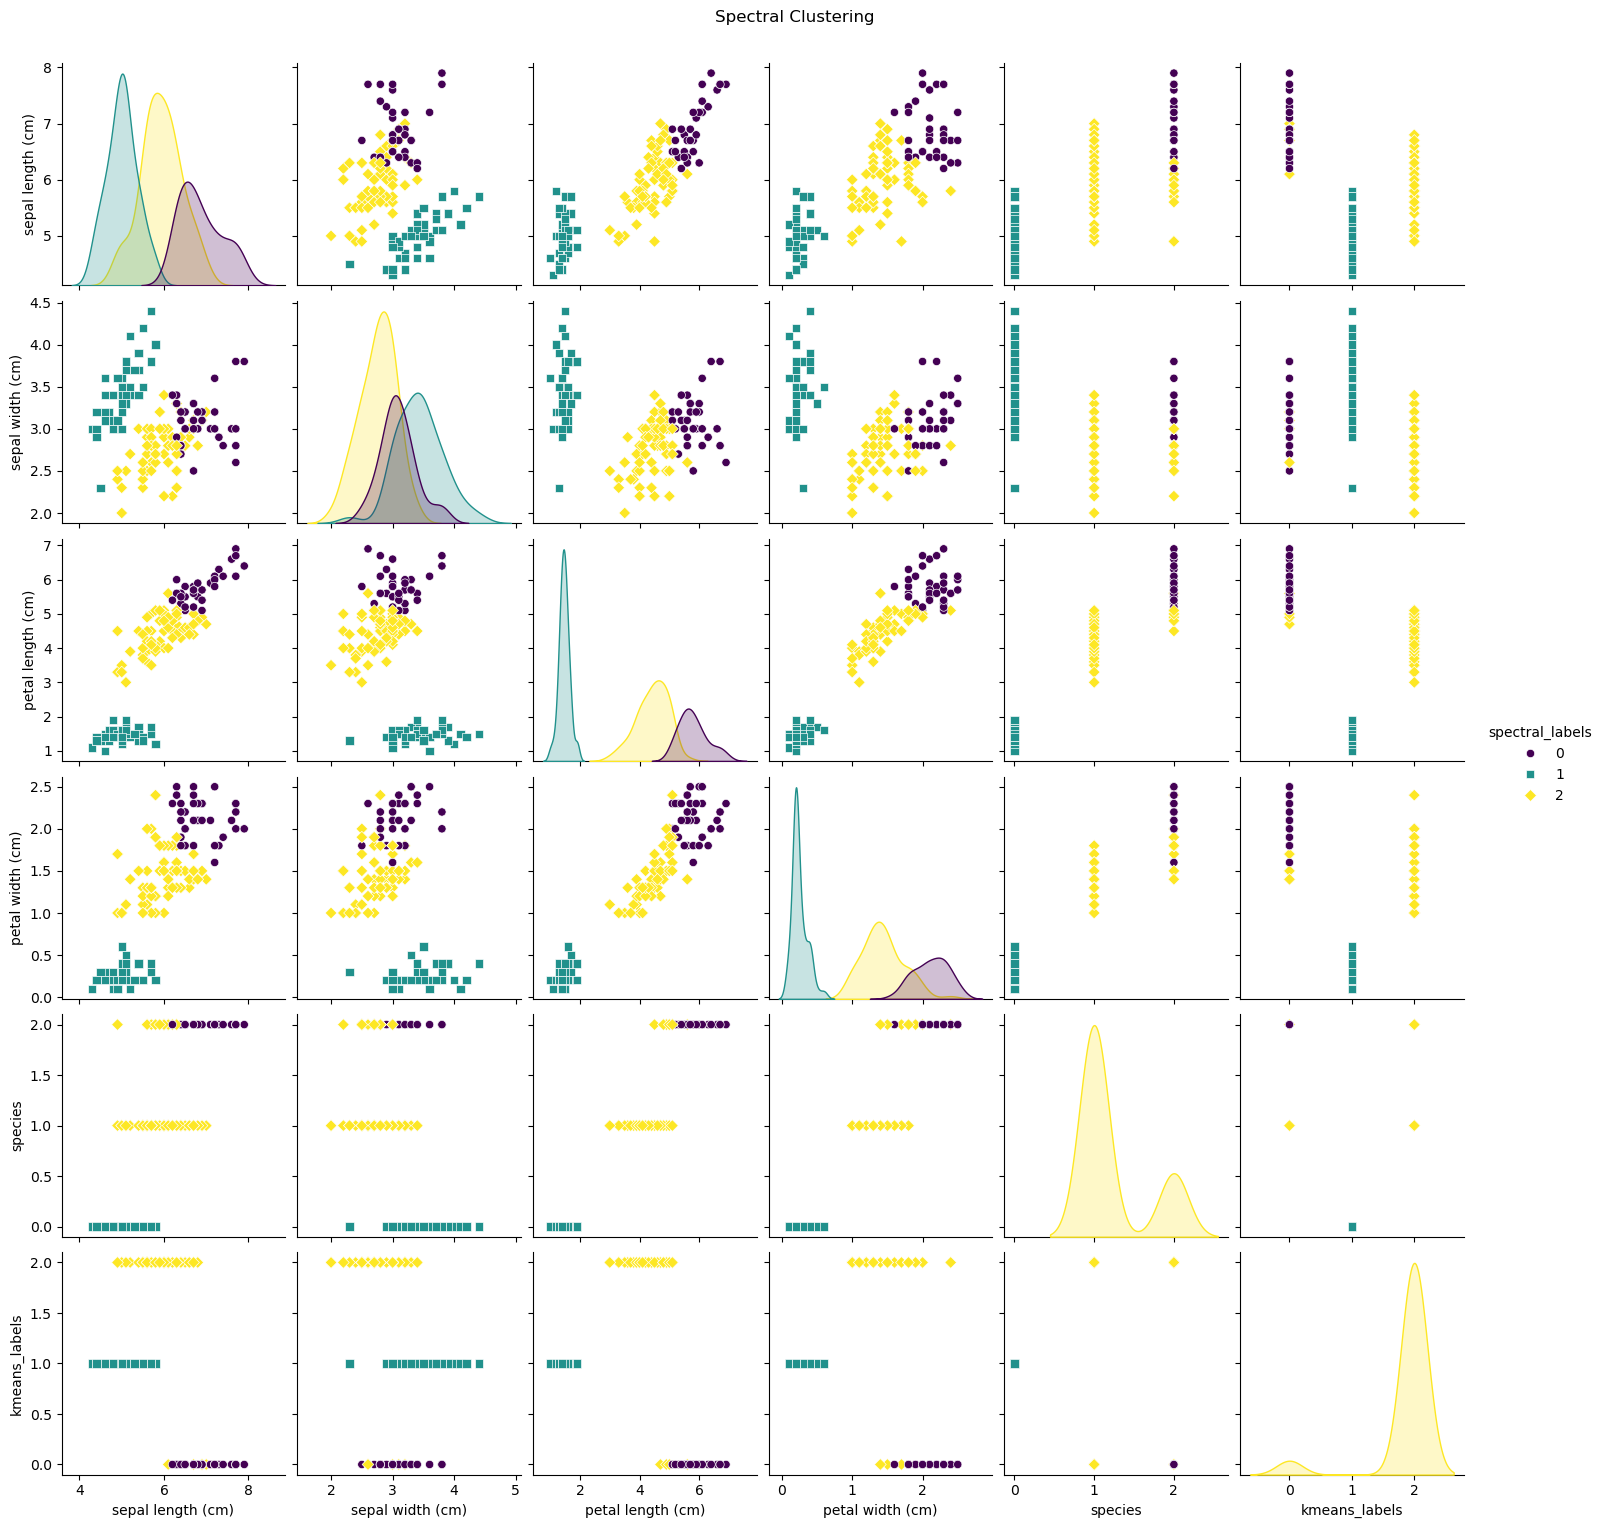

Comparison of Clustering Algorithms:
             Algorithm  Silhouette Score  Adjusted Rand Index
0              K-Means          0.551192             0.716342
1  Spectral Clustering          0.555306             0.745504


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load IRIS dataset
data = load_iris()
X = data.data
y = data.target

#Convert to a DataFrame for visualization purpose
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = y

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='rbf', gamma=0.5, random_state=42)
spectral_labels = spectral.fit_predict(X)

# Evaluate clustering using Silhouette Score and Adjusted Rand Index
kmeans_silhouette = silhouette_score(X, kmeans_labels)
spectral_silhouette = silhouette_score(X, spectral_labels)

kmeans_rand = adjusted_rand_score(y, kmeans_labels)
spectral_rand = adjusted_rand_score(y, spectral_labels)

print("K-Means Clustering:")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Adjusted Rand Index: {kmeans_rand}")
print()

print("Spectral Clustering:")
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette}")
print(f"Spectral Clustering Adjusted Rand Index: {spectral_rand}")
print()

#Add the cluster results to the DataFrame
df['kmeans_labels'] = kmeans_labels
df['spectral_labels'] = spectral_labels

# Plot the cluster results
sns.pairplot(df, hue='species', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle("True Labels", y=1.02)
plt.show()

#K-Means Clustering
sns.pairplot(df, hue='kmeans_labels', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()

#Spectral Clustering
sns.pairplot(df, hue='spectral_labels', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle("Spectral Clustering", y=1.02)
plt.show()

#Compare the algorithms
comparison = pd.DataFrame({'Algorithm': ['K-Means', 'Spectral Clustering'], 'Silhouette Score': [kmeans_silhouette, spectral_silhouette], 'Adjusted Rand Index': [kmeans_rand, spectral_rand]})
print("Comparison of Clustering Algorithms:")
print(comparison)

In [15]:
# End of Assignment